# Worksheet Generation

In [5]:
import numpy as np
import requests
import imageio
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance
import reportlab as rl
from os.path import exists

In [8]:
# Slow-Motion slack-y rope wave

video_url = "https://public.boxcloud.com/d/1/b1!pHGwXK-e9wlnBW_IIvzvyCu7zrjTQ1vWFo6Xxw8ccv2IMvxe-0RTShmUAi1AQtqjROTmqoFrBqQiS5FhjaRvfZYQVYx1pj0bFJNIzyq3CL9sTgE8svH8zfzxvC_aHipkGvTOSNgGOPJqOUyF4idoDz28TIvv3TXSkuejlE774NVTo8oLZQ7fG0D5uUxGOHgWLu0x8jBtz4DbKywFlQ8elp05cpRsrciMY5o1pPkYgPpMRH8VgyFU7WYyjvSxzn2t6lfOpfSDhWKe7TgOx3us9jTNrBhhlruehA6aQvPmsqjr9OejP9G7ujgG8xUOu8Cb9HtgH39yufWnaCes4-ClaCMWb_4nXCrAAx7mjXhySXNM8L3zKw9NR-oXdnxvTi7T-5NlrSR96h6Up2fBt5FDyTM2anLKc2bvNeGZkBpMSOj6fMxfYlDYU9rR8MRHm8whm98lpIIbediaolhF7StMyf7necjPrmvarETWpS8-OFaUmFCPqc1wLWOq-tdZpxB8PfADbBTekF2gKmZDEdSOlZy0lRlEmaL4zxgAhGyH403tTXjsJVN1fVKS16ErTVfH6kREvz2V25NLJR3CstgRB8giejyOuZeh56_aJ5ymh_xxjLqCRWLUFo0CLof-f0lVsgdYBvlDP-2-zaeIMZomHETiEXXIwrZFVL9noAh-ziFAsl-OBaeR1ul0z6RDnyGTqdgP3tNniQhnlteZeCFl2Gyi8ADArKSKbjfNl8t8aXH4ylhNdRg-7VB3S3z3OELQGthntxmMcq4yrDc7Lqwa8aL02DkaDxbqgvhjC_lvpDv_qRn-oG4oNxTwVOLOEQ4x1mmFwoz4z2b8-xCkqpj2gcgpuh-hEXVXbLHUH1bHLa50s3SiIKV5Bd9gpkNYUc0dmVIxT3DMO_cZYEtfNXpiClso1Z8GB4D9o-L-6OZHFNj29lwSQtnReMrXFYt7u0vlftH3UGdFsJ5NoQAcfU-6R2lwfm0I-igAxAOp9UX61SUCcVtDjTKYdlazowdEm6OFSW60BIFrCiyKhbzcGhsRxGaTwog9EoAu0E2EDsvVjeyyEq283Hd0zx_2myJ5T_nkvzT3H3QJz_ZDyHAbWtJmmZMJSmXo17SRQL3uUHj6KODW6GROisvJI8-LRou7iOVEkuhUZb6aVt3M4M8qSsqA8ugBAfU6c2SbnYWuU2scukxbKHjXKUQ0NLL8Cj7zVB_9ab41Br5GUaGd3TXG/download"
video_filename = "rope-wave-1.mp4"

In [7]:
if not exists(video_filename):
    r = requests.get(video_url, stream=True)
    r.raise_for_status()

    size = 0
    with open(video_filename, 'wb') as fd:
        for chunk in r.iter_content(chunk_size=1024*1024):
            print(".", end="", flush=True)
            size += len(chunk)
            fd.write(chunk)
    print()
    print(f"received {size/1024/1024:.1f} MB...")

    print("done")

......................................................................................................................................................
received 150.0 MB...
done


In [9]:
vid_reader = imageio.get_reader(video_filename,  'ffmpeg')

def get_frame(frame_nr):
    return Image.fromarray(vid_reader.get_data(frame_nr))

def get_processed_frame(frame_nr):
    img = get_frame(frame_nr)# .convert("L")

    #img = img.transform(
    #    (comp_grid_x, comp_grid_y), Image.QUAD,
    #    top_left + bottom_left + bottom_right + top_right,
    #    Image.BILINEAR)
    
    img = ImageEnhance.Contrast(img).enhance(2)
    
    return img

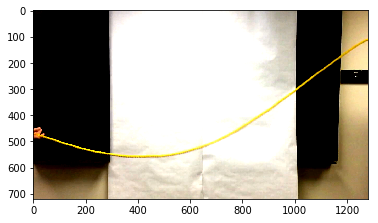

In [10]:
frame = get_processed_frame(22)

plt.imshow(frame)

In [46]:
from reportlab.pdfgen import canvas
from reportlab.lib.utils import ImageReader
from reportlab.lib.pagesizes import letter, A4
from reportlab.lib import colors

def draw_boxes(c, base_x, base_y, box_width, box_height, nboxes):
    for i in range(nboxes):
        c.rect(base_x, base_y + i*box_height, box_width, box_height)

def hello(c, pagesize):
    pwidth, pheight = pagesize
   
    margin = 40
    img_width = pwidth - 2*margin
    scale_fac = img_width/frame.width
    img_height = frame.height*scale_fac
    img_bottom = pheight-margin-img_height

    c.drawImage(ImageReader(frame), margin, img_bottom, width=img_width, height=img_height)
    
    mm = 72/25.4
    
    minor_spacing = 4
    major_spacing = 4*minor_spacing
    
    for i in range(0, int(img_width // mm), minor_spacing):
        if i % major_spacing == 0:
            c.setLineWidth(1)
            c.drawString(margin + i*mm - 4, -10 + img_bottom, f"{i/major_spacing:.1f}")
        else:
            c.setLineWidth(0.5)

        c.setStrokeGray(.3)
        c.line(margin + i*mm, img_bottom, margin + i*mm, pheight-margin)
        c.setStrokeColor(colors.black)

    for i in range(0, int(img_height // mm), minor_spacing):
        if i % major_spacing == 0:
            c.setLineWidth(1)
            c.drawString(margin - 20, -4 + img_bottom+i*mm, f"{i/major_spacing:.1f}")
        else:
            c.setLineWidth(0.5)

        c.setStrokeGray(.3)
        c.line(margin, img_bottom + i*mm, pwidth-margin, img_bottom + i*mm )
        c.setStrokeColor(colors.black)
        
    box_height = 7.5*mm
    box_width = 30*mm
    nboxes = int((img_bottom - margin - 15)//box_height)
    draw_boxes(c, margin + 10*mm, margin, box_width, box_height, nboxes)
    draw_boxes(c, margin + 10*mm + box_width, margin + box_height*0.5, box_width, box_height, nboxes-1)
    draw_boxes(c, margin + 10*mm + 2*box_width, margin + box_height, box_width, box_height, nboxes-2)

c = canvas.Canvas("worksheet.pdf", pagesize=letter)
hello(c, letter)
c.showPage()
c.save()

You can now download the worksheet from the file listing.